# ML Clustering Spotify Project

<img src="spotify-logo.jpg">

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sn 
from sklearn.metrics import silhouette_score

# Data Read

In [2]:
# df_original = pd.read_csv("./df_audio_features_1000.csv", index_col= ["name", "artist"])
df_original = pd.read_csv("./df_audio_features_10.csv", index_col= ["artist", "song_name"])
df_original.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
artist,song_name,,,,,,,,,,,,,,,
D12,My Band,0.851,0.849,1,-3.383,0,0.0828,0.4970,0.000002,0.1160,0.844,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
Eminem,The Real Slim Shady,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
Antônio Carlos Jobim,Águas De Março,0.642,0.339,3,-15.503,1,0.1400,0.8540,0.000000,0.1050,0.491,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
Stan Getz,The Girl From Ipanema,0.641,0.140,8,-16.790,1,0.0390,0.8670,0.001660,0.1050,0.388,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
The Rolling Stones,"Paint It, Black",0.464,0.795,1,-9.267,1,0.0926,0.0493,0.002440,0.3990,0.612,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...


# Drop Unnecessary Columns

In [3]:
df = df_original.copy()

# DROP_COLUMNS = ["id", "html", "mode", "type", "time_signature", "duration_ms"]
DROP_COLUMNS = ["id", "html", "mode",  "time_signature", "duration_ms"]

df = df.drop(DROP_COLUMNS, axis= "columns")
df.head()

,,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
artist,song_name,,,,,,,,,,
D12,My Band,0.851,0.849,1,-3.383,0.0828,0.4970,0.000002,0.1160,0.844,120.014
Eminem,The Real Slim Shady,0.949,0.661,5,-4.244,0.0572,0.0302,0.000000,0.0454,0.760,104.504
Antônio Carlos Jobim,Águas De Março,0.642,0.339,3,-15.503,0.1400,0.8540,0.000000,0.1050,0.491,143.418
Stan Getz,The Girl From Ipanema,0.641,0.140,8,-16.790,0.0390,0.8670,0.001660,0.1050,0.388,129.318
The Rolling Stones,"Paint It, Black",0.464,0.795,1,-9.267,0.0926,0.0493,0.002440,0.3990,0.612,158.691


In [4]:
labels = df.columns
labels

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

# Normalisation

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df)
scaled_df = scaler.transform(df)

In [6]:
scaled_df

array([[8.71895425e-01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        4.76669716e-01, 5.00435725e-01, 2.24534502e-06, 1.99660633e-01,
        9.00137741e-01, 6.02076196e-01],
       [1.00000000e+00, 7.76368849e-01, 5.71428571e-01, 9.71414343e-01,
        2.42451967e-01, 2.74203028e-02, 0.00000000e+00, 0.00000000e+00,
        8.03719008e-01, 4.42503369e-01],
       [5.98692810e-01, 3.93341026e-01, 2.85714286e-01, 5.97609562e-01,
        1.00000000e+00, 8.62189166e-01, 0.00000000e+00, 1.68552036e-01,
        4.94949495e-01, 8.42865521e-01],
       [5.97385621e-01, 1.56625073e-01, 1.00000000e+00, 5.54880478e-01,
        7.59377859e-02, 8.75362260e-01, 1.81818182e-03, 1.68552036e-01,
        3.76721763e-01, 6.97799315e-01],
       [3.66013072e-01, 9.35765520e-01, 0.00000000e+00, 8.04648074e-01,
        5.66331199e-01, 4.67746185e-02, 2.67250821e-03, 1.00000000e+00,
        6.33838384e-01, 1.00000000e+00],
       [7.17647059e-01, 9.34575993e-01, 5.71428571e-01, 7.79548473e-01,
   

In [7]:
# Create a DataFrame from the Scaled
scaled_df = pd.DataFrame(scaled_df, index = df.index, columns= labels)
scaled_df.head()

,,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
artist,song_name,,,,,,,,,,
D12,My Band,0.871895,1.000000,0.000000,1.000000,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076
Eminem,The Real Slim Shady,1.000000,0.776369,0.571429,0.971414,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503
Antônio Carlos Jobim,Águas De Março,0.598693,0.393341,0.285714,0.597610,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866
Stan Getz,The Girl From Ipanema,0.597386,0.156625,1.000000,0.554880,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799
The Rolling Stones,"Paint It, Black",0.366013,0.935766,0.000000,0.804648,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000


# Correlation

In [8]:
scaled_df.corr()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.691675,0.148849,0.890128,0.117132,-0.605551,-0.336779,-0.186644,0.503426,0.497632
energy,0.691675,1.000000,-0.390365,0.863083,0.171209,-0.899116,-0.189788,0.385133,0.499457,0.674624
key,0.148849,-0.390365,1.000000,-0.097130,-0.296925,0.187614,-0.255096,-0.210843,0.038501,-0.006463
loudness,0.890128,0.863083,-0.097130,1.000000,0.233040,-0.737264,-0.467934,0.191486,0.637016,0.681110
speechiness,0.117132,0.171209,-0.296925,0.233040,1.000000,-0.022591,-0.220305,-0.008489,0.010855,0.405179
acousticness,-0.605551,-0.899116,0.187614,-0.737264,-0.022591,1.000000,0.036308,-0.379401,-0.323241,-0.581086
instrumentalness,-0.336779,-0.189788,-0.255096,-0.467934,-0.220305,0.036308,1.000000,-0.310769,-0.852864,-0.502472
liveness,-0.186644,0.385133,-0.210843,0.191486,-0.008489,-0.379401,-0.310769,1.000000,0.400739,0.551028
valence,0.503426,0.499457,0.038501,0.637016,0.010855,-0.323241,-0.852864,0.400739,1.000000,0.461261
tempo,0.497632,0.674624,-0.006463,0.681110,0.405179,-0.581086,-0.502472,0.551028,0.461261,1.000000


# Plot the correlation

<Axes: >

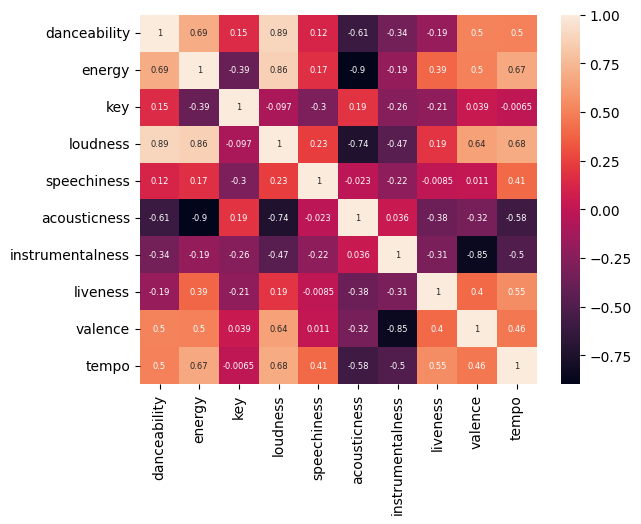

In [9]:
sn.heatmap(
    scaled_df.corr(),
    annot = True,
    annot_kws= {"fontsize": 6}
)

# PLot some Pair Plots

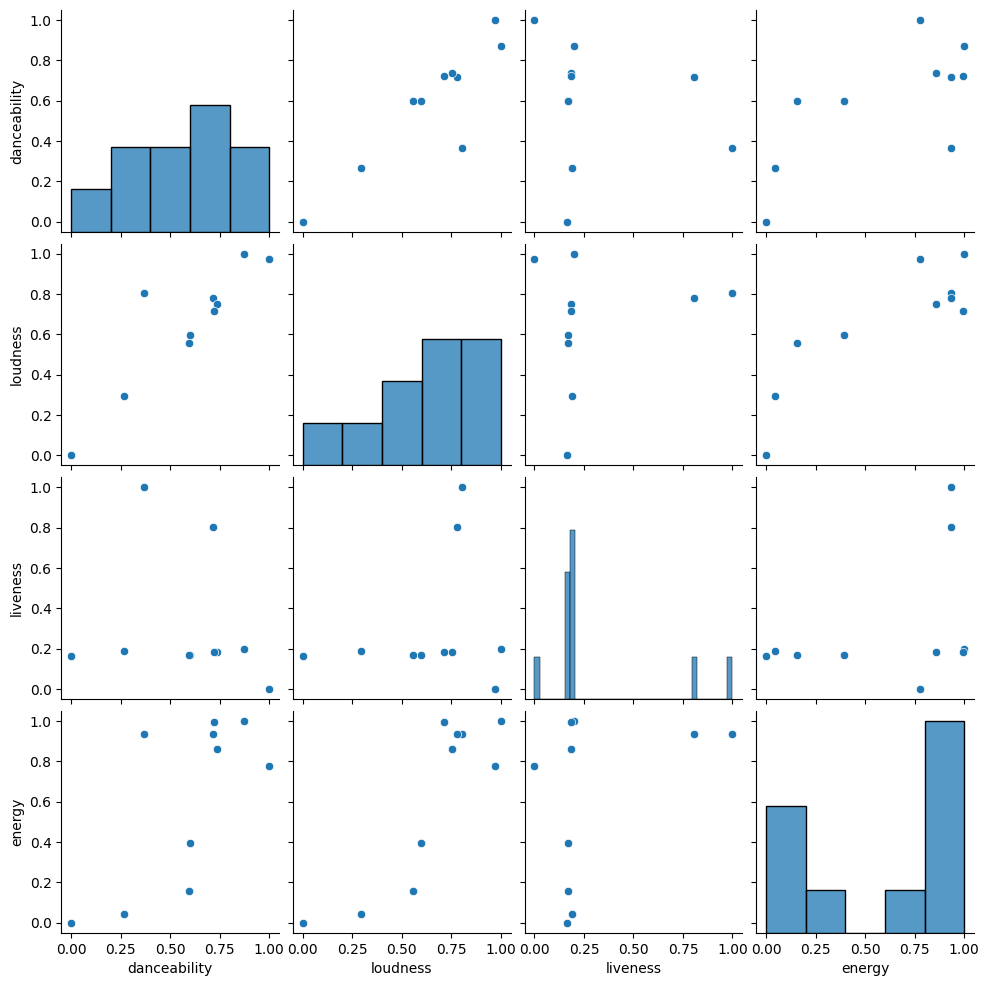

In [10]:
# sn.pairplot(scaled_df)
sn.pairplot(scaled_df, vars = ["danceability", "loudness", "liveness", "energy"])

# KMeans

In [11]:
# Select specific Columns for my Clustering
# train_df = scaled_df[["danceability", "loudness", "liveness"]]
train_df = scaled_df[["loudness", "liveness"]]
train_df.head()

,,loudness,liveness
artist,song_name,,
D12,My Band,1.000000,0.199661
Eminem,The Real Slim Shady,0.971414,0.000000
Antônio Carlos Jobim,Águas De Março,0.597610,0.168552
Stan Getz,The Girl From Ipanema,0.554880,0.168552
The Rolling Stones,"Paint It, Black",0.804648,1.000000


In [12]:
list_of_silhouetescores = []
k_range = range(2, 10)

for k in k_range:
    model = KMeans(n_clusters = k, n_init= 'auto')

    # Fit the model 
    model.fit(train_df) # calculate the centroids
    
    # add the error to the list
    s_score = silhouette_score(train_df, model.labels_)
    
    list_of_silhouetescores.append(s_score)

    print(list_of_silhouetescores)

[0.2504675588412494]
[0.2504675588412494, 0.5894833323405019]
[0.2504675588412494, 0.5894833323405019, 0.5655108850332334]
[0.2504675588412494, 0.5894833323405019, 0.5655108850332334, 0.41943642558646016]
[0.2504675588412494, 0.5894833323405019, 0.5655108850332334, 0.41943642558646016, 0.31861676091804725]
[0.2504675588412494, 0.5894833323405019, 0.5655108850332334, 0.41943642558646016, 0.31861676091804725, 0.43951409616570025]
[0.2504675588412494, 0.5894833323405019, 0.5655108850332334, 0.41943642558646016, 0.31861676091804725, 0.43951409616570025, 0.29522910957796994]
[0.2504675588412494, 0.5894833323405019, 0.5655108850332334, 0.41943642558646016, 0.31861676091804725, 0.43951409616570025, 0.29522910957796994, 0.1426142206890438]


Text(0, 0.5, 'Silh. Score')

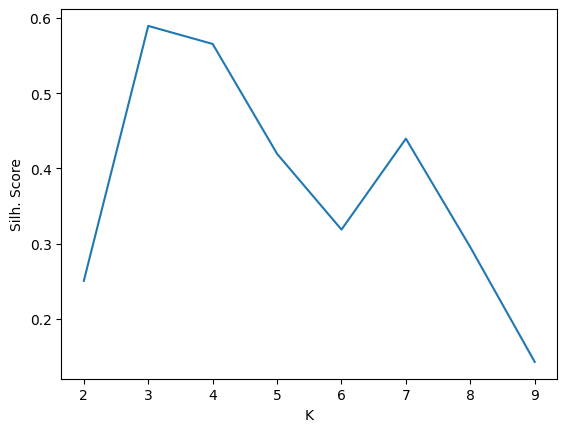

In [13]:
plt.plot(k_range, list_of_silhouetescores)
plt.xlabel("K")
plt.ylabel("Silh. Score")

In [14]:
scaled_df['cluster'] = model.labels_
scaled_df

,,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
artist,song_name,,,,,,,,,,,
D12,My Band,0.871895,1.000000,0.000000,1.000000,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,3
Eminem,The Real Slim Shady,1.000000,0.776369,0.571429,0.971414,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,6
Antônio Carlos Jobim,Águas De Março,0.598693,0.393341,0.285714,0.597610,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,8
Stan Getz,The Girl From Ipanema,0.597386,0.156625,1.000000,0.554880,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,5
The Rolling Stones,"Paint It, Black",0.366013,0.935766,0.000000,0.804648,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,1
Dire Straits,Sultans Of Swing,0.717647,0.934576,0.571429,0.779548,0.000000,0.059036,0.040197,0.804864,1.000000,0.891797,7
Eats Everything,Space Raiders - Charlotte de Witte Remix,0.738562,0.859636,0.428571,0.751594,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362,0
Amelie Lens,In Silence,0.721569,0.995242,0.000000,0.713347,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332,0
Johannes Brahms,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",0.000000,0.000000,0.285714,0.000000,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484,2


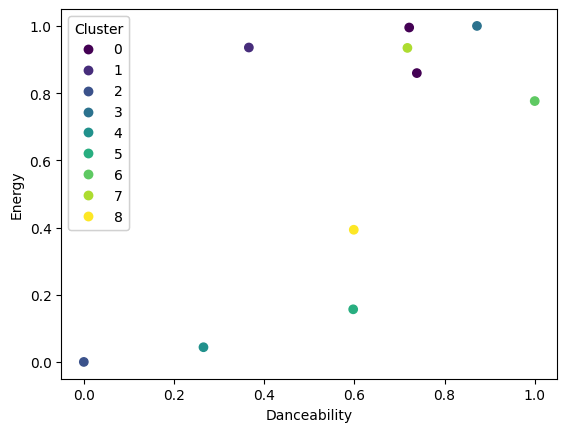

In [15]:
fig, ax = plt.subplots()
scatter = ax.scatter(scaled_df['danceability'], scaled_df['energy'], c=scaled_df['cluster'])
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

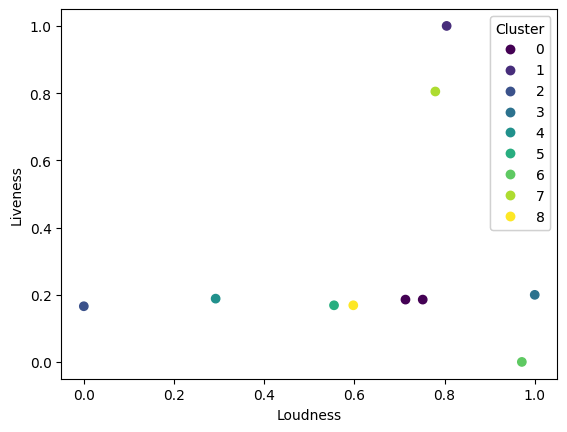

In [16]:
fig, ax = plt.subplots()
scatter = ax.scatter(scaled_df["loudness"], scaled_df["liveness"], c=scaled_df['cluster'])
ax.set_xlabel('Loudness')
ax.set_ylabel('Liveness')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

### In this projectt:
- We load the Spotify music dataset from a 'df_audio_features_10.csv' file. 
- We select relevant features for clustering from the DataFrame.
- We perform K-means clustering using `KMeans` class from scikit-learn.
- The predicted cluster labels are added back into the original dataframe.
- Finally, we visualize clustered data using scatter plot where danceability and energy and liveness and loudness are plotted against each other and colored by their respective cluster.